In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [88]:
batting= pd.read_csv('Batting.csv')
batting

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0
5,armstbo01,1871,1,FW1,NaN,12,49,9,11,2,...,5.0,0.0,1.0,0,1.0,NaN,NaN,NaN,NaN,0.0
6,barkeal01,1871,1,RC1,NaN,1,4,0,1,0,...,2.0,0.0,0.0,1,0.0,NaN,NaN,NaN,NaN,0.0
7,barnero01,1871,1,BS1,NaN,31,157,66,63,10,...,34.0,11.0,6.0,13,1.0,NaN,NaN,NaN,NaN,1.0
8,barrebi01,1871,1,FW1,NaN,1,5,1,1,1,...,1.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
9,barrofr01,1871,1,BS1,NaN,18,86,13,13,2,...,11.0,1.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0


In [91]:
#find average strikeouts per year
avg_strikeouts_all_time= np.mean(batting['SO'])
avg_strikeouts_all_time

20.577056890353795

In [122]:
# average strikeouts for players with more than 50 ABs
starting_batters= batting.loc[batting['AB'] >= 50]
np.mean(starting_batters['SO'])

38.8985950267474

In [201]:
#find SOs by Year
batting_by_year= batting.groupby('yearID').sum()
batting_by_year

,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
yearID,,,,,,,,,,,,,,,,,,
1871,115,2296,10822,2659,3101,434,239,47,1783.0,441.0,123.0,393,175.0,0.0,0.0,0.0,0.0,74.0
1872,172,3305,15663,3390,4467,581,145,37,2132.0,269.0,134.0,263,264.0,0.0,0.0,0.0,0.0,97.0
1873,128,3604,16959,3580,4926,570,211,47,2331.0,314.0,131.0,335,278.0,0.0,0.0,0.0,0.0,122.0
1874,126,4199,19104,3470,5224,634,194,40,2252.0,242.0,97.0,238,357.0,0.0,0.0,0.0,0.0,107.0
1875,248,6248,26833,4234,6812,839,273,40,2710.0,629.0,320.0,249,675.0,0.0,0.0,0.0,0.0,142.0
1876,127,4696,20121,3066,5338,633,181,40,1984.0,0.0,0.0,336,589.0,0.0,0.0,0.0,0.0,0.0
1877,106,3247,13667,2040,3705,431,204,24,1410.0,0.0,0.0,345,726.0,0.0,0.0,0.0,0.0,0.0
1878,83,3319,13644,1904,3539,481,132,23,1331.0,0.0,0.0,364,1081.0,0.0,0.0,0.0,0.0,0.0
1879,135,5795,24155,3409,6171,958,317,58,2357.0,0.0,0.0,508,1843.0,0.0,0.0,0.0,0.0,0.0


In [202]:
#Strikeouts per At-Bat
SO_per_AB= batting_by_year['SO']/batting_by_year['AB']
SO_per_AB

yearID
1871    0.016171
1872    0.016855
1873    0.016392
1874    0.018687
1875    0.025156
          ...   
2014    0.226074
2015    0.226276
2016    0.235454
2017    0.242222
2018    0.249087
Length: 148, dtype: float64

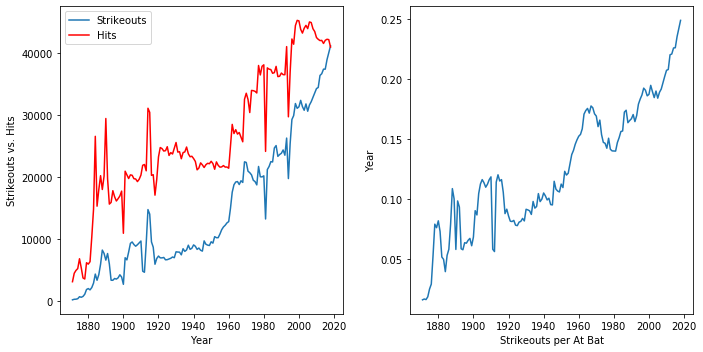

In [203]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(batting_by_year['SO'], label= 'Strikeouts')
plt.plot(batting_by_year['H'], label= 'Hits', color= 'red')
plt.xlabel('Year')
plt.legend(loc= 'upper left')
plt.ylabel('Strikeouts vs. Hits')

plt. subplot(1, 2, 2)
plt.plot(SO_per_AB)
plt.xlabel('Year')
plt.ylabel('Strikeouts per At Bat')
plt.tight_layout()
plt.show()

At first glance, there seems to be many more batters striking out each year, but that may have been due to hosting more players and games. The graph on the right demonstrates that strikeouts are indeed much more common over time, presumably due to pitchers improving. Over the last 140 years, the chance of striking out has skyrocketed from 1.6% to **24.9%** per at bat in 2018! As batting has become more difficult, hits eclipsed strikeouts last year. Does this mean a less exciting offensive game? Let's look deeper.

In [209]:
#Calculating runs per game and RBI per game 
runs_per_game= batting_by_year['R']/batting_by_year['G']
RBI_per_game= batting_by_year['RBI']/batting_by_year['G']

In [222]:
extra_base_hits= batting_by_year['2B']+ batting_by_year['3B'] + batting_by_year['HR']
plate_appearances= (batting_by_year['AB']+batting_by_year['BB'] + batting_by_year['HBP']+batting_by_year['SF'])
OBP= (batting_by_year['H']+batting_by_year['BB']+batting_by_year['HBP'])/plate_appearances *100
SO_percentage = (batting_by_year['SO'])/ plate_appearances *100

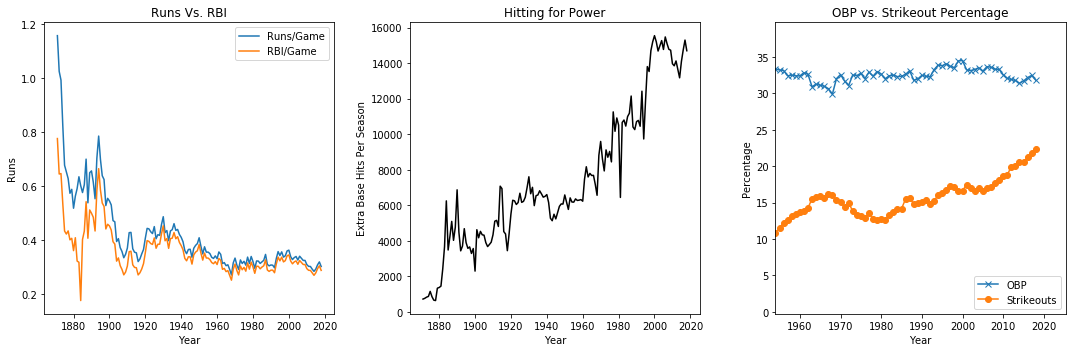

In [226]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(runs_per_game, label= 'Runs/Game')
plt.plot(RBI_per_game, label= 'RBI/Game')
plt.xlabel('Year')
plt.ylabel('Runs')
plt.title('Runs Vs. RBI')
plt.legend(loc= 'upper right')

plt.subplot(1, 3, 2)
plt.plot(extra_base_hits, color= 'black')
plt.xlabel('Year')
plt.ylabel('Extra Base Hits Per Season')
plt.title('Hitting for Power')

plt.subplot(1, 3, 3)
plt.plot(OBP, label= 'OBP', marker= 'x')
plt.plot(SO_percentage,label= 'Strikeouts', marker= 'o')
plt.xlim(xmin= 1954)
plt.title('OBP vs. Strikeout Percentage')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(loc= 'lower right')

plt.tight_layout()
plt.show()

## Results
Here we can see that although batters have scored roughly the same number of runs per game since the 1940s, the batting _power_ has increased- hitters have been much more succesful in hitting for extra bases, nearly doubling from the 1960s. In the third plot, we see that on-base-percentage(OBP) has not changed significantly since its inception in 1954, but batters are twice as likely to strike out. In conclusion, the MLB has traded off consistent hitting for power. Whether that is more exciting is up to the audience.  

In [266]:
#Checking distribution of career HRs
batting_by_player= batting.groupby('playerID').sum()
eligible= batting_by_player.loc[(batting_by_player['AB']+batting_by_player['BB'] + batting_by_player['HBP']+batting_by_player['SF']) > 3000 ]
eligible

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
playerID,,,,,,,,,,,,,,,,,,,
aaronha01,45195,23,3298,12364,2174,3771,624,98,755,2297.0,240.0,73.0,1402,1383.0,293.0,32.0,21.0,121.0,328.0
abbated01,19051,11,855,3044,355,772,99,43,11,324.0,142.0,0.0,289,283.0,0.0,33.0,93.0,0.0,0.0
abreubo01,40100,22,2425,8480,1453,2470,574,59,288,1363.0,400.0,128.0,1476,1840.0,115.0,33.0,7.0,85.0,165.0
abreujo02,10080,5,742,2913,398,858,180,13,146,488.0,8.0,3.0,209,624.0,46.0,67.0,0.0,24.0,86.0
adairje01,29465,17,1165,4019,378,1022,163,19,57,366.0,29.0,29.0,208,499.0,31.0,17.0,41.0,30.0,149.0
adamsbo03,29290,16,1281,4019,591,1082,188,49,37,303.0,67.0,30.0,414,447.0,1.0,17.0,78.0,5.0,62.0
adamssp01,26997,15,1424,5557,844,1588,249,48,9,394.0,154.0,50.0,453,223.0,0.0,28.0,136.0,0.0,14.0
adcocjo01,33286,17,1959,6606,823,1832,295,35,336,1122.0,20.0,25.0,594,1059.0,55.0,17.0,52.0,35.0,223.0
ageeto01,25583,14,1129,3912,558,999,170,27,130,433.0,167.0,81.0,342,918.0,26.0,34.0,21.0,15.0,99.0


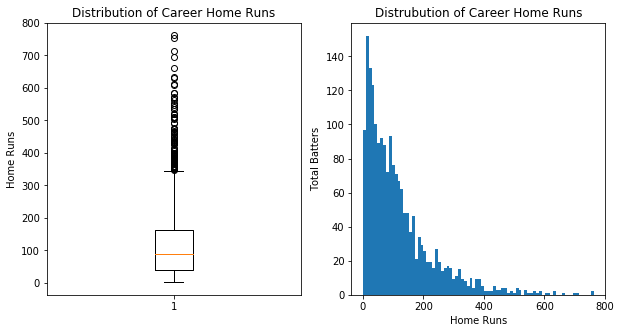

In [281]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.boxplot(eligible['HR'], notch=False)
plt.ylabel('Home Runs')
plt.title('Distribution of Career Home Runs')

plt.subplot(1, 2, 2)
plt.hist(eligible['HR'], bins= 80)
plt.title('Distrubution of Career Home Runs')
plt.xlabel('Home Runs')
plt.ylabel('Total Batters')
plt.show()

Though most players hit about 100 home runs on average, there are many outliers above the top whisker, up to a maximum of 762, far above the IQR upper limit of ~150. The mean and median for the data may be far different based on the wide distribution of Home runs. However, the histogram shows a strong right skewed distribution, meaning the outliers will skew the mean higher and misrepresent the average home run hitter's production.

In [276]:
the_greatest= eligible['HR'].max()
weakest_player= eligible['HR'].min()

87.5

In [267]:
"The best Home run hitter of all time hit {} home runs.".format(the_greatest)

'The best Home run hitter of all time hit 762 home runs.'

In [252]:
"The worst Home run hitter of all time hit {} home run.".format(weakest_player)

'The worst Home run hitter of all time hit 1 home run.'